In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# Importar dataset CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


In [3]:
train_images, test_images = train_images /255.0 , test_images /255.0

In [5]:
train_images[0].shape

(32, 32, 3)

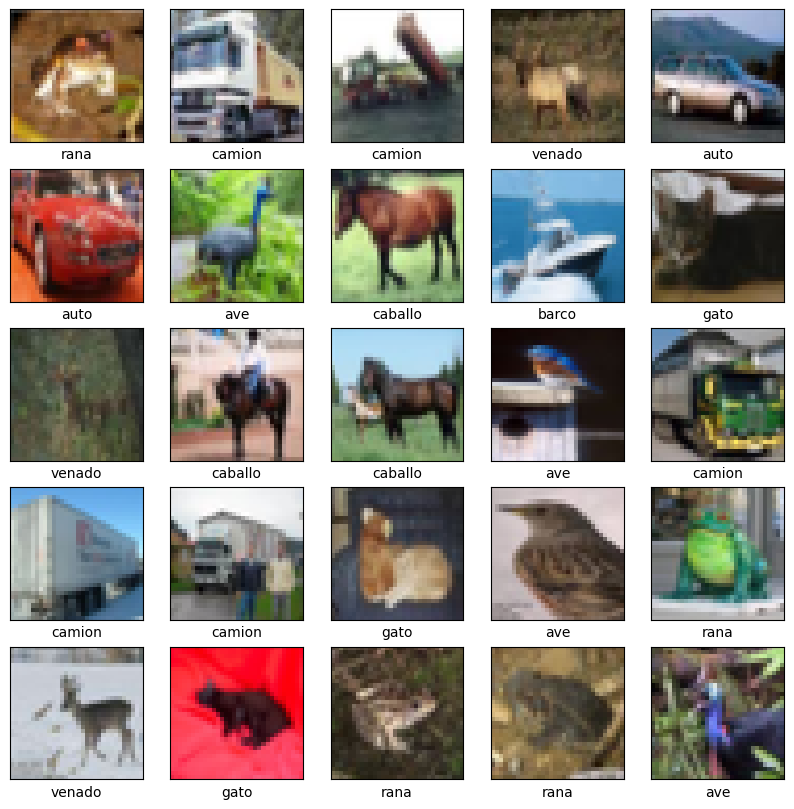

In [4]:
clases = ['avion', 'auto', 'ave', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(clases[train_labels[i][0]])
plt.show()

# Crear Modelo Convolucional

In [22]:
modelo_conv = models.Sequential()
modelo_conv.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
modelo_conv.add(layers.MaxPooling2D((2,2)))
modelo_conv.add(layers.Conv2D(64, (3,3), activation="relu"))
modelo_conv.add(layers.MaxPooling2D((2,2)))
modelo_conv.add(layers.Conv2D(128, (3,3), activation="relu"))

modelo_conv.add(layers.Flatten())

modelo_conv.add(layers.Dense(64, activation ="relu"))
modelo_conv.add(layers.Dense(10))

In [23]:
modelo_conv.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compilar Modelo
modelo_conv.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [25]:
historial = modelo_conv.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3570 - loss: 1.7315 - val_accuracy: 0.5515 - val_loss: 1.2301
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5923 - loss: 1.1543 - val_accuracy: 0.6417 - val_loss: 1.0241
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6678 - loss: 0.9539 - val_accuracy: 0.6803 - val_loss: 0.9140
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7111 - loss: 0.8280 - val_accuracy: 0.6808 - val_loss: 0.9183
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7393 - loss: 0.7442 - val_accuracy: 0.7017 - val_loss: 0.8616
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7667 - loss: 0.6704 - val_accuracy: 0.7009 - val_loss: 0.8644
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7868 - loss: 0.6016 - val_accuracy: 0.6967 - val_loss: 0.8991
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.8010 -

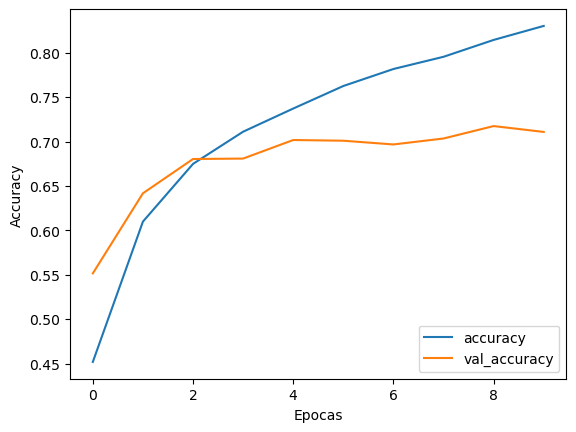

In [27]:
plt.plot(historial.history['accuracy'], label="accuracy")
plt.plot(historial.history['val_accuracy'], label="val_accuracy")
plt.xlabel("Epocas")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()

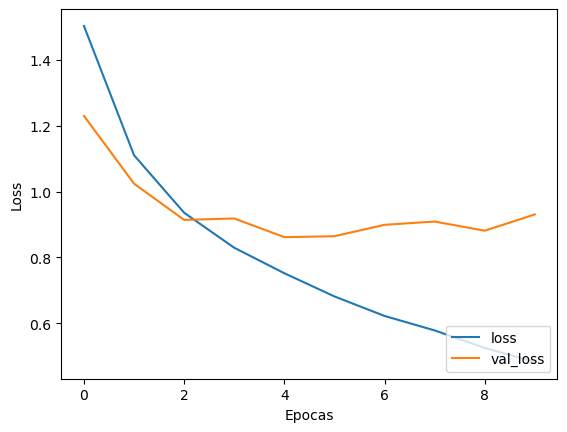

In [28]:
plt.plot(historial.history['loss'], label="loss")
plt.plot(historial.history['val_loss'], label="val_loss")
plt.xlabel("Epocas")
plt.ylabel("Loss")
plt.legend(loc='lower right')
plt.show()